In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sp
from scipy.optimize import curve_fit
from plotnine import *
theme_set(theme_bw)

In [3]:
def find_nearest(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
def peaks(y):
    peaks1,prop  = sp.find_peaks(y[543:624],2800)
    peaks1 = np.array(543+peaks1)
    print(peaks1)
    return peaks1

def peaky(x,y, start,fin,w):
    start = find_nearest(x,start)
    fin = find_nearest(x,fin)
    geusse = np.argmax(y[start:fin])
    geusse += start
    popt, pcov = curve_fit(gaussian, x[geusse-w:geusse+w],y[geusse-w:geusse+w],p0=[3000, x[geusse], 1])
    return popt

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def find_peaks_MoS2(x,y,w=3,lines=False):
    start_peak1 = find_nearest(x,370)
    fin_peak1 = find_nearest(x,390)
    start_peak2 = find_nearest(x,395)
    fin_peak2 = find_nearest(x,420)
    
    geusse1 = np.argmax(y[start_peak1:fin_peak1]) + start_peak1
    geusse2 = np.argmax(y[start_peak2:fin_peak2]) + start_peak2
    
    popt1, pcov = curve_fit(gaussian, x[geusse1-w:geusse1+w],y[geusse1-w:geusse1+w],p0=[3000, x[geusse1], 1])
    popt2, pcov = curve_fit(gaussian, x[geusse2-w:geusse2+w],y[geusse2-w:geusse2+w],p0=[3000, x[geusse2], 1])
    if lines == True:
        return popt1[1],popt2[1]
    else:
        return popt2[1]- popt1[1]



  Flake  Seperation
4    F5   24.371188
5    F6   24.028775
1    F2   22.625161
3    F4   22.506864
2    F3   22.045258
0    F1   20.390674


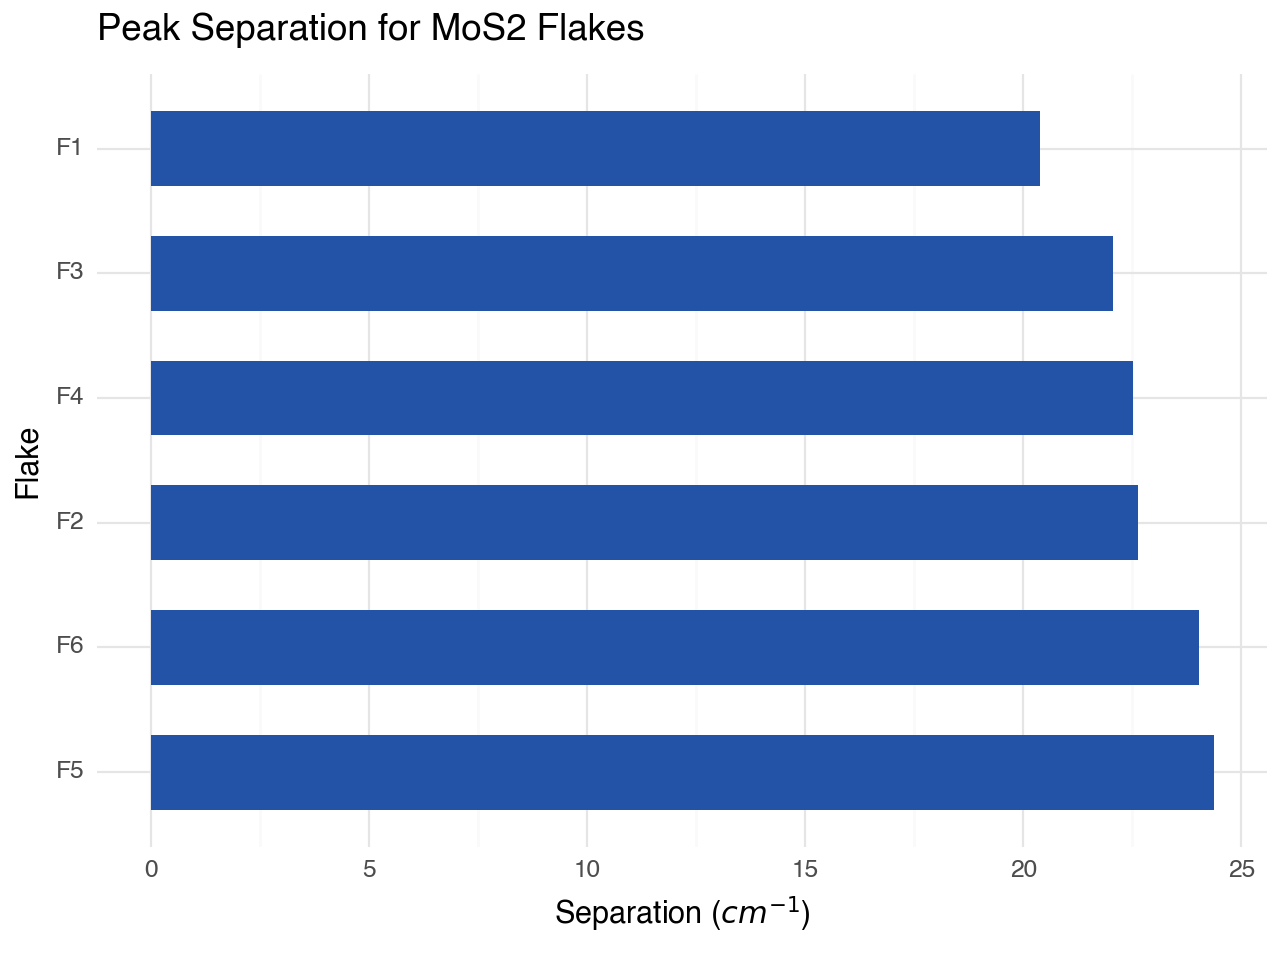

<Figure Size: (640 x 480)>

In [111]:
F1 = np.loadtxt("20251119/F1.txt")
F2 = np.loadtxt("20251119/F2.txt")
F3 = np.loadtxt("20251119/F3.txt")
F4 = np.loadtxt("20251119/F4.txt")
F5 = np.loadtxt("20251119/F5.txt")
F6 = np.loadtxt("20251119/F6.txt")

Raman_20251119 = pd.DataFrame(columns=["Flake","x","y"])

Raman_20251119["Flake"] = np.concatenate((np.repeat("F1",len(F1[:,0])),
                                          np.repeat("F2",len(F2[:,0])),
                                          np.repeat("F3",len(F3[:,0])),
                                          np.repeat("F4",len(F4[:,0])),
                                          np.repeat("F5",len(F5[:,0])),
                                          np.repeat("F6",len(F6[:,0]))))
Raman_20251119["x"] = np.concatenate((F1[:,0],F2[:,0],F3[:,0],F4[:,0],F5[:,0],F6[:,0]))
Raman_20251119["y"] = np.concatenate((F1[:,1],F2[:,1],F3[:,1],F4[:,1],F5[:,1],F6[:,1]))
Raman_20251119["Seperation"] = np.concatenate(((np.repeat(find_peaks_MoS2(F1[:,0],F1[:,1]),len(F1[:,0])),
                                               np.repeat(find_peaks_MoS2(F2[:,0],F2[:,1]),len(F2[:,0])),
                                               np.repeat(find_peaks_MoS2(F3[:,0],F3[:,1]),len(F3[:,0])),
                                               np.repeat(find_peaks_MoS2(F4[:,0],F4[:,1]),len(F4[:,0])),
                                               np.repeat(find_peaks_MoS2(F5[:,0],F5[:,1]),len(F5[:,0])),
                                               np.repeat(find_peaks_MoS2(F6[:,0],F6[:,1]),len(F6[:,0])))))


df = pd.DataFrame([["F1",find_peaks_MoS2(F1[:,0],F1[:,1])],
                   ["F2",find_peaks_MoS2(F2[:,0],F2[:,1])],
                   ["F3",find_peaks_MoS2(F3[:,0],F3[:,1])],
                   ["F4",find_peaks_MoS2(F4[:,0],F4[:,1])],
                   ["F5",find_peaks_MoS2(F5[:,0],F5[:,1])],
                   ["F6",find_peaks_MoS2(F6[:,0],F6[:,1])]
                   ], columns=["Flake","Seperation"])
df.sort_values(by=["Seperation"],ascending=False, inplace=True)
print(df)

(ggplot(df,aes(x = "Flake", y = "Seperation"))
 +geom_bar(stat = "identity", fill="#2253A7FF", width = 0.6)
 +scale_x_discrete(limits=df["Flake"].tolist())
 +coord_flip()
 +theme_minimal()
 +labs(x='Flake',y=r"Separation ($cm^{-1}$)" ,title="Peak Separation for MoS2 Flakes"))


In [112]:
num = df["Seperation"].to_numpy()
df2 = Raman_20251119.copy()
df2.rename(columns={"Flake":"Flake_copy"},inplace=True)
Raman_20251119 = Raman_20251119.sort_values("Seperation")
Raman_20251119["Flake"] = pd.Categorical(Raman_20251119["Flake"],categories=df["Flake"].to_numpy(),ordered=True)

/var/folders/nz/w1y866l54cd210lbkmf1cn0m0000gp/T/ipykernel_84533/1591376996.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/var/folders/nz/w1y866l54cd210lbkmf1cn0m0000gp/T/ipykernel_84533/1591376996.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/var/folders/nz/w1y866l54cd210lbkmf1cn0m0000gp/T/ipykernel_84533/1591376996.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/var/folders/nz/w1y866l54cd210lbkmf1cn0m0000gp/T/ipykernel_84533/1591376996.py:15: Depre

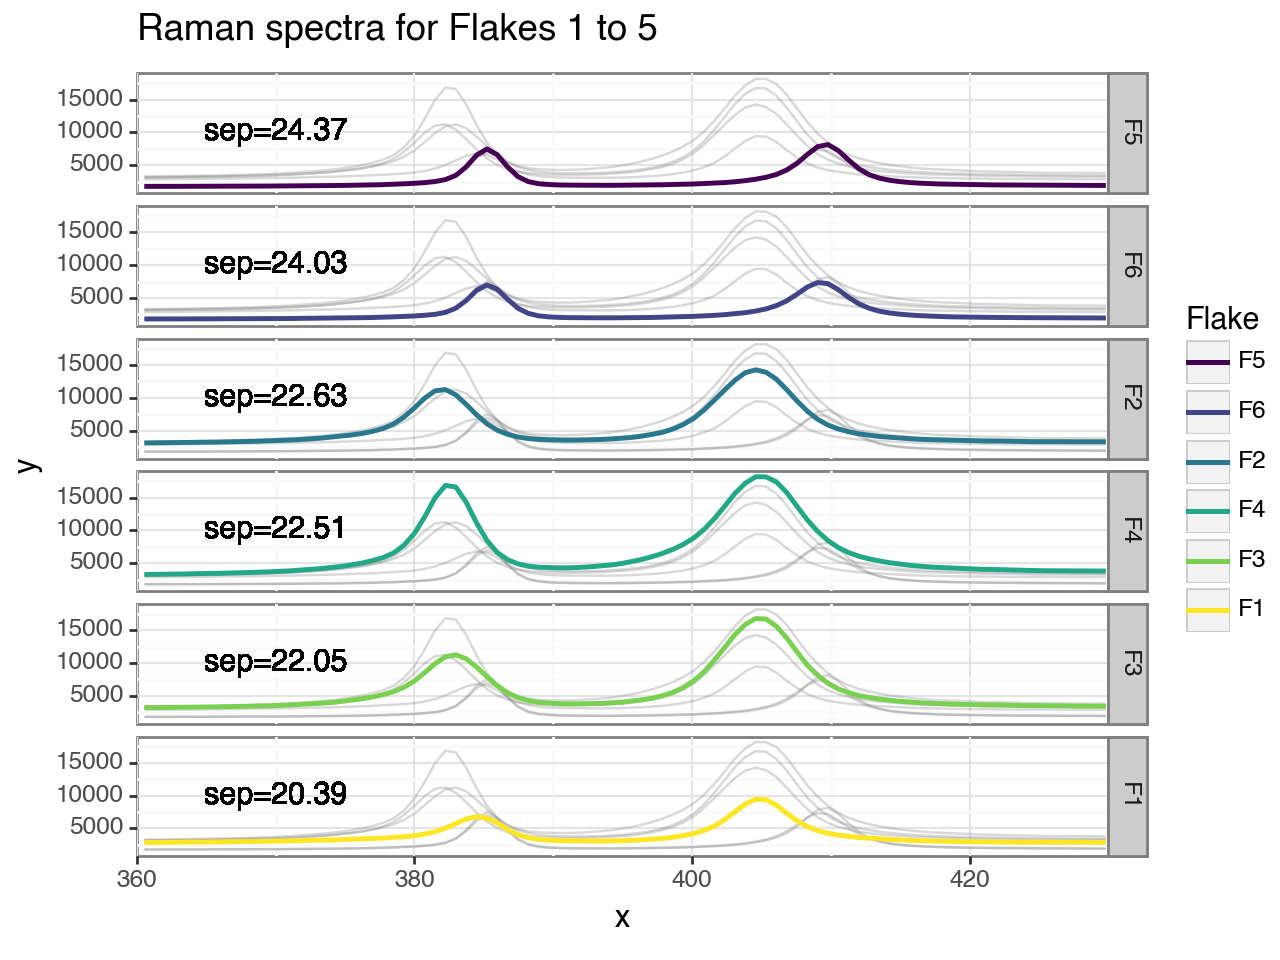

<Figure Size: (640 x 480)>

In [142]:
f1 = "F1"
p = (ggplot(Raman_20251119,aes(x="x",y="y",color="Flake"))
    +geom_line(df2,aes(x="x",y="y",group="Flake_copy"),color="gray",alpha=0.3)
    +geom_line(size=1)
    +scale_x_continuous(expand=(0,0),limits=(360,430))
    +facet_grid("Flake~")
    +labs(title="Raman spectra for Flakes 1 to 5")
)
flake = df["Flake"].to_numpy()
f1 = "F1"
for i,j in enumerate(df["Seperation"].to_numpy()):
    f1 = df["Flake"].to_numpy()[i]
    p = p +geom_text(data=Raman_20251119.query("Flake==@f1"),
                     x=370,y=10000,
                     label="sep="+str(float(np.round(df.query("Flake==@f1")["Seperation"].to_numpy(),2))),
                     color="black")
p

In [69]:
mono = 18, bi = 22, tri = 23, four = 24, bulk = 25

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2315516023.py, line 1)